# Test NetReg

Docs https://dirmeier.github.io/netReg/articles/netReg_commandline.html

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

def flatten(list_of_lists): return [item for sublist in list_of_lists for item in sublist]


## I. Generate synthetic "easy" graph and graph signals

In [22]:
num_nodes = 15
p_edge = 0.3
g1 = nx.fast_gnp_random_graph(num_nodes, p_edge)
g2 = nx.fast_gnp_random_graph(num_nodes, p_edge)

nx.relabel_nodes(g2, {number: number + 15 for number in g2.nodes}, copy=False)

g = nx.compose(g1, g2)

g.add_edge(1, 25)
g.add_edge(2, 20)
g.add_edge(3, 15)

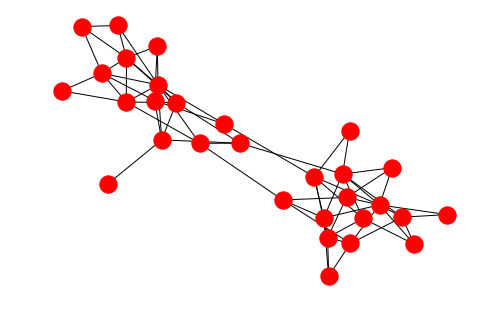

In [23]:
nx.draw_spring(g)

In [24]:
nx.to_pandas_adjacency(g).to_csv('./GX.tsv', sep='\t', header=False, index=False)

#### True signal comes from 0 and its neighbors

In [25]:
signal_nodes = [0]+[n for n in g.neighbors(0)]
signal_nodes

[0, 4, 8, 10]

#### First half is class 1, second half is class 0

In [26]:
NUM_POSITIVES = 20
NUM_NEGATIVES = 20
y = np.concatenate((np.ones(NUM_POSITIVES), np.zeros(NUM_NEGATIVES)))
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [27]:
data = pd.DataFrame(np.random.normal(size=(NUM_POSITIVES+NUM_NEGATIVES,30)))
data.loc[0:NUM_POSITIVES, signal_nodes] = 1
data.loc[NUM_POSITIVES:NUM_POSITIVES+NUM_NEGATIVES, signal_nodes] = -1

data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.903347,-0.128162,0.572380,1.0,-0.004519,1.079736,0.916224,1.0,-1.626318,...,-0.600198,-0.668972,0.092678,-0.109018,0.431590,-0.084260,-0.846324,0.015333,-1.210628,0.856874
1,1.0,-1.279885,0.960301,0.437157,1.0,-0.757789,-2.151379,-0.051448,1.0,-0.421560,...,0.057303,1.291067,0.233242,-0.864555,-0.285750,-0.951169,-0.417615,0.020936,-1.046191,-1.069503
2,1.0,0.558501,0.151264,-0.699504,1.0,0.951491,-0.795638,-0.041552,1.0,1.216233,...,1.365128,0.939043,2.041606,-0.602816,1.387625,-0.365063,1.530591,-0.837005,-0.007999,-2.269240
3,1.0,-0.712538,-0.531382,-1.876617,1.0,0.403563,0.017788,-0.299936,1.0,0.286593,...,0.509495,0.559179,-1.068002,-0.285172,1.233343,0.707240,-0.746940,1.218185,0.290775,2.017524
4,1.0,-1.044032,-0.885235,-0.557718,1.0,0.330755,-2.405410,-1.879886,1.0,-1.099572,...,-0.098214,-0.684259,0.779088,0.219892,1.359714,-0.692724,-0.570500,-0.449152,0.210697,1.039060


In [28]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
35,-1.0,0.400117,0.699755,-0.747789,-1.0,1.131007,-0.040273,1.204940,-1.0,-0.350392,...,-0.864574,-0.484737,0.842224,-0.019289,0.418997,-0.308423,-0.211950,0.097453,0.087887,1.085850
36,-1.0,-1.426152,-0.528884,0.135399,-1.0,0.719906,0.242300,-0.220248,-1.0,-0.402100,...,-1.755135,0.623342,-0.853497,-0.943191,-0.588174,-0.849837,0.314306,-0.314638,0.637343,1.751768
37,-1.0,-0.712975,0.342902,-1.780513,-1.0,1.025383,0.550930,0.078756,-1.0,-0.077454,...,0.623931,-0.329903,0.652825,-1.296676,0.548088,0.421803,-1.523543,-0.790050,-0.106530,-0.698059
38,-1.0,0.741554,0.044848,0.291540,-1.0,0.089251,-0.325427,1.417877,-1.0,3.348531,...,0.726098,0.265082,0.913017,-1.552725,0.408055,0.363023,0.052344,-0.728154,1.344748,0.124876
39,-1.0,-2.054809,0.509471,-0.080326,-1.0,-0.916427,0.698094,-1.461984,-1.0,-0.958942,...,0.310732,-1.470281,-0.440905,-0.345298,0.924052,1.603482,0.255118,0.420428,-0.255117,0.941498


In [29]:
data.to_csv('./X.tsv', sep='\t', header=False, index=False)

In [30]:
pd.Series(y).to_csv('./Y.tsv', sep='\t', index=False, header=False)

#### `./netreg.sh`

## II. Evaluate results

In [38]:
coefs = pd.read_csv('./outfile_coefficients.tsv', header=None).values

In [40]:
intercept = pd.read_csv('./outfile_intercepts.tsv', header=None).values

In [49]:
np.dot(data, coefs) + intercept

array([[0.48736403],
       [0.47926488],
       [0.47119545],
       [0.23539492],
       [0.35371555],
       [0.49234293],
       [0.40171248],
       [0.45141993],
       [0.4617121 ],
       [0.37109439],
       [0.42282059],
       [0.52438357],
       [0.39533622],
       [0.52885164],
       [0.39110291],
       [0.45996463],
       [0.41831423],
       [0.47832352],
       [0.43788251],
       [0.48298009],
       [0.37001015],
       [0.52665516],
       [0.42549788],
       [0.54948846],
       [0.41606247],
       [0.40362595],
       [0.46746456],
       [0.38099377],
       [0.52168367],
       [0.37981589],
       [0.4409982 ],
       [0.5075481 ],
       [0.46194563],
       [0.30500498],
       [0.40507901],
       [0.31624432],
       [0.34330683],
       [0.44936012],
       [0.45985584],
       [0.42089784]])